This is a brief example designed to be run from the already prepared quick_start file, which just puts together some data columns + a target (age) in the same csv

In [1]:
import BPt as bp

In [2]:
# Load data
data = bp.read_csv('quick_start.csv',
                   index_col='participant_id')

# Specify which column is our target variable
data = data.set_target('age')

# Set sex as non-input, and as binary variable
data = data.set_non_input('sex').to_binary('sex')
data.head()

lh_G&S_frontomargin_thickness  lh_G&S_occipital_inf_thickness  \
participant_id                                                                  
sub-0001                                1.925                           2.517   
sub-0002                                2.405                           2.340   
sub-0003                                2.477                           2.041   
sub-0004                                2.179                           2.137   
sub-0005                                2.483                           2.438   

                lh_G&S_paracentral_thickness  lh_G&S_subcentral_thickness  \
participant_id                                                              
sub-0001                               2.266                        2.636   
sub-0002                               2.400                        2.849   
sub-0003                               2.255                        2.648   
sub-0004                               2.366                        2.885   
sub-0005                               2.219                        2.832   

                lh_G&S_transv_frontopol_thickness  \
participant_id                                      
sub-0001                                    2.600   
sub-0002                                    2.724   
sub-0003                                    2.616   
sub-0004                                    2.736   
sub-0005                                    2.686   

                lh_G&S_cingul-Ant_thickness  lh_G&S_cingul-Mid-Ant_thickness  \
participant_id                                                                 
sub-0001                              2.777                            2.606   
sub-0002                              2.888                            2.658   
sub-0003                              2.855                            2.924   
sub-0004                              2.968                            2.576   
sub-0005                              3.397                            2.985   

                lh_G&S_cingul-Mid-Post_thickness  \
participant_id                                     
sub-0001                                   2.736   
sub-0002                                   2.493   
sub-0003                                   2.632   
sub-0004                                   2.593   
sub-0005                                   2.585   

                lh_G_cingul-Post-dorsal_thickness  \
participant_id                                      
sub-0001                                    2.956   
sub-0002                                    3.202   
sub-0003                                    2.984   
sub-0004                                    3.211   
sub-0005                                    3.028   

                lh_G_cingul-Post-ventral_thickness  ...  \
participant_id                                      ...   
sub-0001                                     2.925  ...   
sub-0002                                     2.868  ...   
sub-0003                                     2.972  ...   
sub-0004                                     2.428  ...   
sub-0005                                     3.361  ...   

                rh_S_postcentral_thickness  \
participant_id                               
sub-0001                             2.038   
sub-0002                             1.882   
sub-0003                             2.066   
sub-0004                             1.930   
sub-0005                             1.938   

                rh_S_precentral-inf-part_thickness  \
participant_id                                       
sub-0001                                     2.425   
sub-0002                                     2.513   
sub-0003                                     2.410   
sub-0004                                     2.241   
sub-0005                                     2.445   

                rh_S_precentral-sup-part_thickness  rh_S_suborbital_thickness  \
participant_id                           

Let's plot our target variable

age: 224 rows


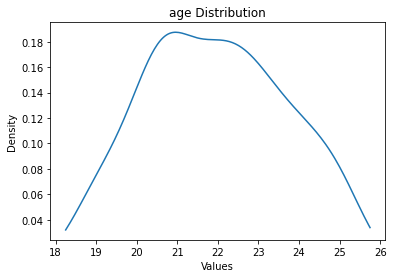

sex: 224 rows
age: 224 rows
Plotting 224 overlap valid subjects.


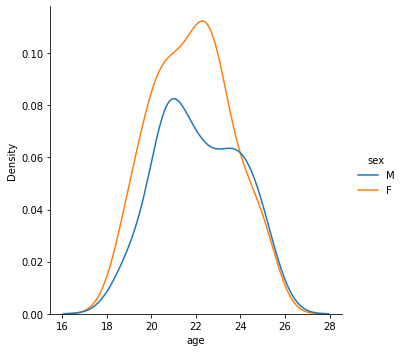

In [3]:
data.plot('age')
data.plot_bivar('age', 'sex')

Let's jump straight until an ML example, w/ the default settings:

If we don't specify anything, evaluate will by default perform a 5-fold cross validation. As our pipeline
also we are going to specify a pre-defined pipeline.

In [4]:
results = bp.evaluate('ridge_pipe', data)

Predicting target = age
Using problem_type = regression
Using scope = all (defining a total of 148 features).
Evaluating 224 total data points.


Folds:   0%|          | 0/5 [00:00<?, ?it/s]


Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 1.6 seconds.
explained_variance: 0.1786
neg_mean_squared_error: -3.17

Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 1.5 seconds.
explained_variance: 0.1446
neg_mean_squared_error: -2.19

Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 1.8 seconds.
explained_variance: 0.1142
neg_mean_squared_error: -3.44

Training Set: (179, 148)
Validation Set: (45, 148)
Fit fold in 2.0 seconds.
explained_variance: 0.1005
neg_mean_squared_error: -2.66

Training Set: (180, 148)
Validation Set: (44, 148)
Fit fold in 2.0 seconds.
explained_variance: 0.0243
neg_mean_squared_error: -2.65



This returns us a results evaluator object

In [5]:
results

BPtEvaluator
------------
explained_variance: 0.1124 ± 0.0516
neg_mean_squared_error: -2.82 ± 0.4357

Saved Attributes: ['estimators', 'preds', 'timing', 'train_subjects', 'val_subjects', 'feat_names', 'ps', 'mean_scores', 'std_scores', 'weighted_mean_scores', 'scores', 'fis_', 'coef_', 'cv']

Avaliable Methods: ['to_pickle', 'compare', 'get_X_transform_df', 'get_inverse_fis', 'get_preds_dfs', 'subset_by', 'get_fis', 'get_coef_', 'permutation_importance']

Evaluated With:
target: age
problem_type: regression
scope: all
subjects: all
random_state: 1


So what did we even run? What is that ridge pipe? We can see a representation of it below in the full scikit-learn style syntax

In [6]:
results.estimator

BPtPipeline(steps=[('mean float',
                    ScopeTransformer(estimator=SimpleImputer(), inds=Ellipsis)),
                   ('median category',
                    ScopeTransformer(estimator=SimpleImputer(strategy='median'), inds=[])),
                   ('robust float',
                    ScopeTransformer(estimator=RobustScaler(quantile_range=(5, 95)), inds=Ellipsis)),
                   ('one hot encoder category',
                    BPtTransformer(estimator=OneHotEncoder(handle_unknow...
                    BPtModel(estimator=NevergradSearchCV(estimator=Ridge(max_iter=100, random_state=1, solver='lsqr'), param_distributions={'alpha': Log(lower=0.001, upper=100000.0)}, ps={'cv': BPtCV(cv_strategy=CVStrategy(), n_repeats=1, splits=3, splits_vals=None), 'cv__cv_strategy': CVStrategy(), 'cv__cv_strategy__groups': None, 'cv__cv_strategy__stratify': None, 'cv__cv_strategy__train_only_subjects': None, 'cv__n_repeats': 1, 'cv__only_fold': None, 'cv__random_state': 'context', 'cv

In the base BPt model-style syntax it is a little less complex

In [7]:
from BPt.default.pipelines import ridge_pipe
ridge_pipe

Pipeline(steps=[Imputer(obj='mean', scope='float'),
                Imputer(obj='median', scope='category'), Scaler(obj='robust'),
                Transformer(obj='one hot encoder', scope='category'),
                Model(obj='ridge',
                      param_search=ParamSearch(cv=CV(cv_strategy=CVStrategy()),
                                               n_iter=60),
                      params=1)])

We can also get the feature importances as averaged across each fold

In [8]:
fis = results.get_fis(mean=True)
fis

lh_G&S_cingul-Ant_thickness           0.035434
lh_G&S_cingul-Mid-Ant_thickness      -0.117493
lh_G&S_cingul-Mid-Post_thickness     -0.104482
lh_G&S_frontomargin_thickness         0.021461
lh_G&S_occipital_inf_thickness       -0.006280
                                        ...   
rh_S_suborbital_thickness            -0.036355
rh_S_subparietal_thickness           -0.020749
rh_S_temporal_inf_thickness           0.021025
rh_S_temporal_sup_thickness          -0.003753
rh_S_temporal_transverse_thickness   -0.070986
Length: 148, dtype: float32

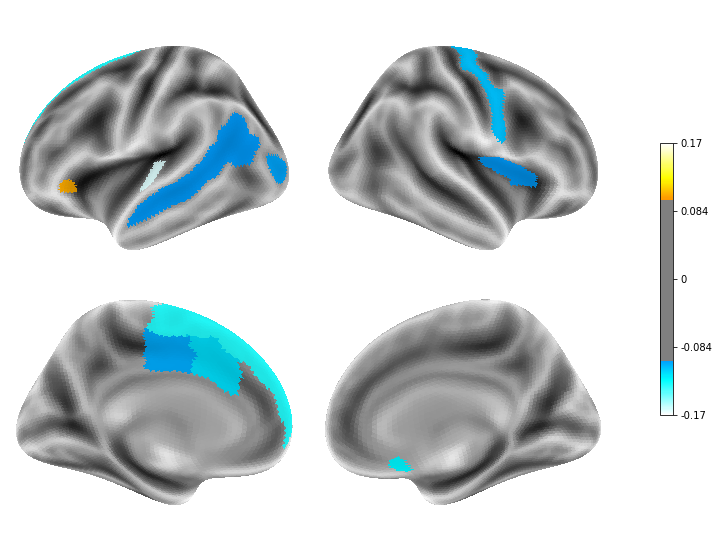

In [9]:
from neurotools.plotting import plot
plot(fis, threshold=.1)

This plotting function tries to basically automate everything. As a caveat to the automatic roi detection it should be noted that only a small number of underlying parcellations are supported, including, the destr. parcellation.

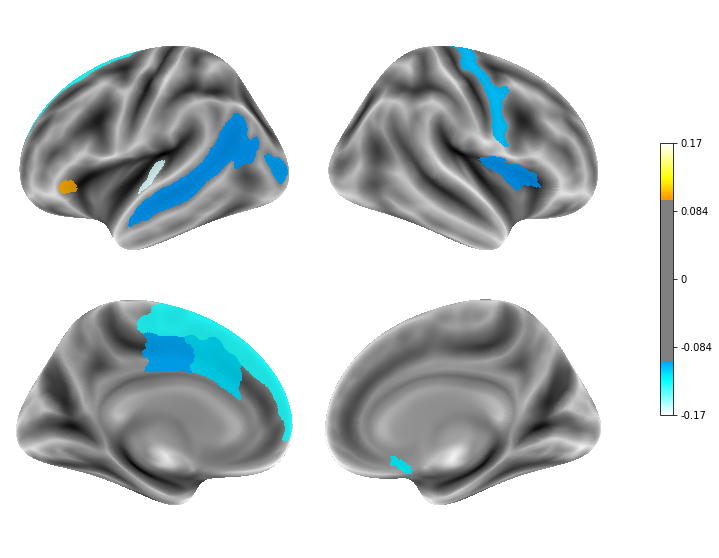

In [10]:
# A supported space can either be automatically detected, or in this
# case we specify the higher resolution fsaverage mesh
plot(fis, threshold=.1, space='fsaverage')